# Correlation
Describes the degree to which two variables are related. There are multiple correlation coefficients, each designed for different data types and assumptions.

## Covariance
Before introducing correlation coefficients, it is necessary to understand covariance.

Covariance measures the **joint variability**(variance) of two random variables. In practical terms, it quantifies whether deviations from the mean of one variable tend to coincide with deviations from the mean of another.

For example, consider height and weight. When weight is above its average, is height also typically above its average (positive covariance)? Or does height tend to be below its average (negative covariance)?

- positive covariance: variables tend to increase or decrease together
- negative covariance: one variable tends to increase while the other decreases

Covariance is **scale-dependent** and influenced by the **units of measurement**. Because of this, raw covariance values are not directly comparable across datasets or variable pairs.

To address this limitation, **correlation coefficients** standardize covariance, producing a unitless measure constrained to a fixed range (typically −1 to 1).

### Calculating covariance

Covariance is computed by measuring how each variable deviates from its mean and then averaging the product of those deviations.

#### Sample covariance

In practice, we almost always work with samples rather than full populations. The sample covariance between two variables \(x\) and \(y\) with \(n\) observations is given by:

$$
\operatorname{cov}(x, y)
=
\frac{1}{n - 1}
\sum_{i=1}^{n}
(x_i - \bar{x})(y_i - \bar{y})
$$

Where:
- $\bar{x}$ is the sample mean of $x$
- $\bar{y}$ is the sample mean of $y$
- $n$ is the number of observations

The $n - 1$ term in the denominator applies **Bessel’s correction**, ensuring that the estimator is unbiased when working with sample data.

#### Interpretation of the formula

Each term $(x_i - \bar{x})(y_i - \bar{y})$ represents a **co-deviation**:
- Positive when both variables are above or below their means
- Negative when one is above its mean and the other is below

The covariance is the average of these co-deviations.

Because these deviations retain the original units of both variables, the resulting covariance has units equal to the **product of the units of $x$ and $y$**. This property explains why covariance magnitudes are difficult to interpret directly and motivates the use of correlation coefficients.



# Correlation coefficients

A correlation coefficient is a **descriptive statistical measure** that quantifies the **direction and strength of a linear relationship** between two variables. It is used to summarize observed associations in data and **does not imply causation**.

Correlation coefficients are **unit-free**, which makes them directly comparable across different variables and datasets. They are commonly used to assess whether changes in one variable are systematically associated with changes in another.

Scatterplots are an essential exploratory tool when working with correlation. They allow visual inspection of:
- The direction of the relationship
- The strength of the association
- The overall shape of the data (linear vs. non-linear)
- The presence of outliers

This visual assessment helps determine which correlation coefficient is appropriate for the dataset (e.g., linear vs. monotonic relationships, parametric vs. non-parametric assumptions).

A critical consideration in correlation analysis is the presence of **outliers**. Extreme values can disproportionately influence correlation coefficients, particularly **Pearson’s correlation**, and may lead to misleading conclusions. Each correlation coefficient **comes with specific assumptions** regarding distribution, scale of measurement, and relationship structure. Violating these assumptions reduces statistical power and interpretability.

Correlation measures **association**, not effect size in terms of change. Specifically, correlation does not capture the **steepness (slope)** of a relationship. Two datasets can exhibit the same correlation coefficient while having very different regression slopes. For this reason, correlation alone cannot be used to predict how much one variable will change in response to another.

There are multiple correlation coefficients available, each suited to different analytical contexts. The choice depends on:
- The linearity or monotonicity of the relationship
- The level of measurement of the variables
- The distributional properties of the data

For reliable inference and maximum statistical power, the correlation coefficient should always be selected based on the characteristics of the data rather than convenience.

## Scope and limitations of correlation

Most commonly used correlation coefficients, especially Pearson, are designed to measure **linear associations**. This means they are appropriate only when the relationship between variables can be reasonably approximated by a straight line.

When the relationship is **non-linear**, a correlation coefficient may be close to zero even when a strong and deterministic relationship exists. In such cases, correlation fails not because the variables are unrelated, but because the **form of the relationship violates the linearity assumption**.

As a result, correlation should not be treated as a universal measure of dependence. It is a diagnostic tool for a specific class of relationships and must be applied only after visual and conceptual validation of the data structure.

For non-linear relationships, alternative approaches, such as transformation of variables, rank-based correlation, mutual information, or explicit modeling are more appropriate.

Using correlation indiscriminately can lead to false conclusions, including the incorrect assumption that variables are independent when they are not.


## Interpreting Pearson’s correlation coefficient

Pearson’s correlation coefficient measures the **strength and direction of a linear relationship** between two continuous variables. Its value ranges from −1 to +1.

The **sign** of the coefficient indicates the direction of the relationship:
- Positive values indicate that both variables tend to increase together
- Negative values indicate that one variable tends to increase while the other decreases

The **magnitude** of the coefficient indicates the strength of the linear association:
- Values close to ±1 indicate a strong linear relationship
- Values close to 0 indicate a weak or absent linear relationship

### Key reference values

- **r = +1**  
  Perfect positive linear relationship. All points lie exactly on a straight line with positive slope.

- **r = −1**  
  Perfect negative linear relationship. All points lie exactly on a straight line with negative slope.

- **r ≈ 0**  
  No linear relationship. The data may be unrelated, or the relationship may be non-linear.

### Important interpretation notes

- Pearson’s correlation reflects **closeness to a straight line**, not the slope of that line.  
  Different slopes can produce the same correlation coefficient.

- A correlation close to zero does **not** imply independence.  
  Strong non-linear relationships may still exist.

- Correlation summarizes association, not causation.  
  It should be interpreted as a descriptive statistic, not as evidence of causal effect.

Scatterplots are essential for interpretation, as they reveal the underlying data structure that a single coefficient cannot capture.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
np.random.seed(42)
n = 30
x = np.linspace(0, 10, n)

**Perfect positive correlation**

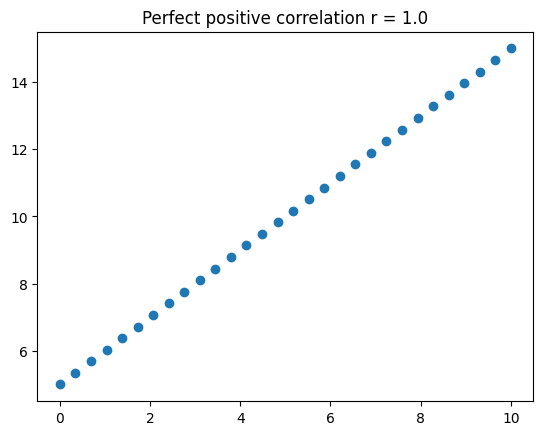

In [3]:
y_pos = x + 5
r , _ = pearsonr(x, y_pos)

f, ax = plt.subplots()
ax.scatter(x, y_pos)
ax.set_title(f'Perfect positive correlation r = {r}')
plt.show()

**Negative perfect correlation**

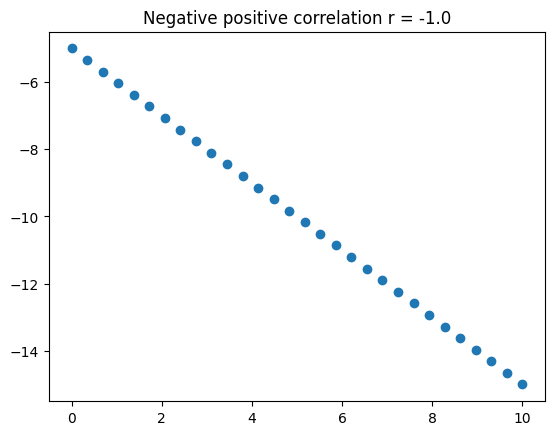

In [4]:
y_pos = -x - 5
r, _ = pearsonr(x, y_pos)

f, ax = plt.subplots()
ax.scatter(x, y_pos)
ax.set_title(f'Negative positive correlation r = {r}')
plt.show()

**Close to zero correlation**

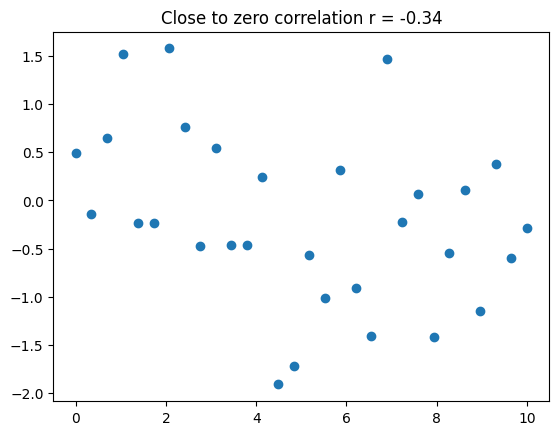

In [5]:
y_pos = np.random.normal(0, 1, n)
r, _ = pearsonr(x, y_pos)

f, ax = plt.subplots()
ax.scatter(x, y_pos)
ax.set_title(f'Close to zero correlation r = {r:.2f}')
plt.show()

## Summary and key takeaways

This notebook introduced correlation as a **descriptive statistical tool** for understanding relationships between variables, with an emphasis on interpretation rather than computation.

We began by framing correlation coefficients as standardized measures of **linear association**, highlighting why covariance alone is insufficient for comparison across variables and datasets. Pearson’s correlation was used as the baseline case to establish intuition about direction, strength, and scale invariance.

Visual exploration was treated as a first-class step in the analysis. Scatterplots were used to demonstrate how correlation values relate to data structure, including perfect positive, perfect negative, and near-zero linear relationships. These examples reinforced that correlation measures **alignment to a straight line**, not causality, slope, or predictability.

The notebook emphasized that correlation has a **limited scope**. It is valid only under specific assumptions and can fail in the presence of non-linearity, and outliers. A correlation close to zero was shown to indicate the absence of **linear** association, **not the absence of dependence**.

From a practical standpoint, this notebook established correlation as a **screening and diagnostic tool**, not a decision-making instrument on its own. Proper use requires:
- visual validation of data structure
- awareness of underlying assumptions
- careful interpretation within context
